# Analyzing Sneakers Resale Dynamics in the US: Off-White x Nike and Yeezy 350
Aryan Kumar, Santiago Mazzei, Tiancheng Yang, Yiming Wang & Yuanshan Zhang



## Abstract

Our project, "Analyzing Sneakers Resale Dynamics in the US," explores the thriving US sneaker resale market, particularly the growth of brands like Off-White and Yeezy. Fueled by our team's passion for analytics and sneakers, we aim to understand consumer behaviors. By analyzing pricing drivers, historical data, and employing predictive analytics, we provide insights for investors and retailers. Our goal is to aid them in navigating this fast-expanding industry and optimizing strategies, ultimately contributing to their success.


## Table of Content

1. Introduction
2. Data Analysis    
3. Data-Related Questions and Answers
4. Conclusion    
5. References           




# 1. Introduction


## 1.1. Problem Definition

In recent years, the sneaker resale market has witnessed substantial growth, particularly for renowned brands like Off-White and Yeezy. This trend has captured the interest of both investors and retailers seeking to gain a comprehensive understanding of this dynamic marketplace. For those contemplating entry into the sneaker resale industry achieving profitability, it is crucial to analyze the fundamental drivers of sneaker pricing, leverage historical data to identify favorable opportunities, and potentially employ predictive analytics to anticipate future sales trends. This strategic approach is essential for optimizing procurement and sales strategies within the industry.

## 1.2. Data Source

The "*Sneakers Resale Dynamics*" Dataset from StockX, can be found [here](https://stockx.com/news/the-2019-data-contest/).

## 1.3. Data Description

The dataset being analyzed comprises a randomly selected subset of U.S. sales data for Off-White x Nike and Yeezy 350 sneakers spanning from September 1, 2017, to February 13, 2019.

This sample was constructed by randomly extracting a fixed percentage (X%) of sales data from StockX for each colorway on a daily basis, starting from September 2017. In essence, for each day that the Off-White Jordan 1 was available on the market, X% of its daily sales were chosen randomly. The precise value of X is not relevant; what matters is that it represents a random sample, and the same fixed X% of sales data was consistently selected for each day and for every type of sneaker.

It's important to note that this sample exclusively encompasses U.S. sales.

The dataset includes 8 variables for your analysis:
1. Order Date,   
2. Brand,
3. Sneaker Name,  
4. Sale Price,
5. Retail Price,
6. Release Date,
7. Shoe Size, and
8. Buyer Region (the state where the buyer's shipment was directed).

We have used the dataset accordingly to utilize any combination of these variables in our analysis, whether it involves one variable or all eight.

The database contains the following basic information:

*   99956 rows
*   8 columns
*   No missing values


We are going to be using Python and Seaborn library to plot and analyze the database.






## 1.4. Motivation

As a team, our deep passion for analytics and sneakers drives us to collaborate in analyzing Sneaker Resale Dynamics to gain a comprehensive understanding of consumer behaviors. Our goal is to provide valuable insights for prospective investors and retailers seeking to navigate the rapidly expanding sneaker resale market. We are motivated by a genuine desire to make a meaningful contribution to the success of big reseller companies and investors by utilizing data analysis to uncover exciting opportunities in this dynamic marketplace.



# 2. Data Analysis

## 2.1. Libraries

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# from scipy.stats import norm
# import missingno as msno
# sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

# import plotly.graph_objects as go
# import plotly.express as px

import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".8"})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow import keras

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 2.2. Data Import

In [ ]:
# Download file using url
import urllib.request
file_url = 'https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019-3.xlsx'
urllib.request.urlretrieve(file_url, 'stockX-Data-Contest-2019-3.xlsx')

('stockX-Data-Contest-2019-3.xlsx',
 <http.client.HTTPMessage at 0x7b7ef9e1a950>)

## 2.3. Data Basic Information

In [ ]:
data = pd.read_excel('/content/stockX-Data-Contest-2019-3.xlsx', sheet_name = 'Raw Data')
df = data.copy()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [ ]:
df.describe()

,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634754,208.61359,9.344181
std,255.982918,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


**Which size was the most popular?**

Sizes 9 to 11 enjoy the highest transaction volume, indicating their popularity among buyers. This suggests that sneakers falling within this size range are in greater demand.

## 2.4. Data Cleaning

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

2840

We chose not to remove duplicates, assuming that orders can be placed on the same date for the same sneaker at the same price

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64


The dataset contains no missing values. We will now check it visually.

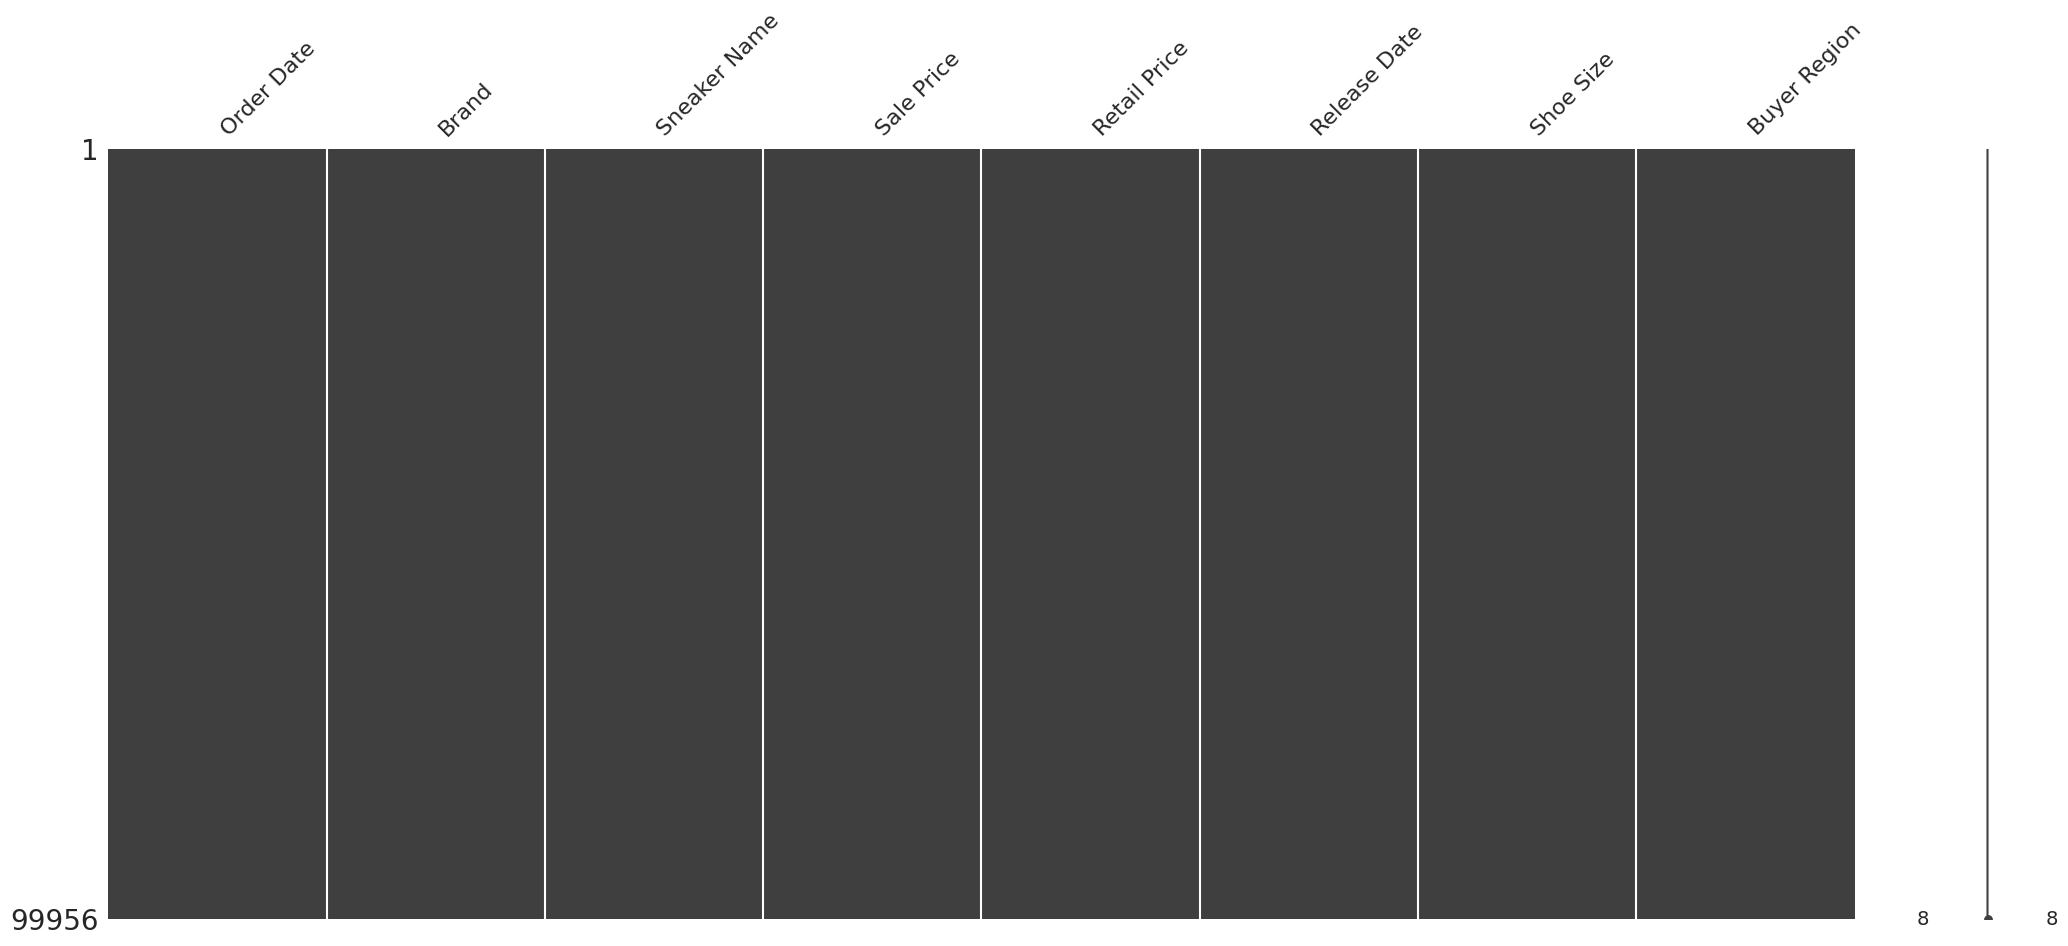

In [ ]:
# Visually checkking for missing values
msno.matrix(df);


As it can be seen, the dataset has no missing values. Now, we will check if all the datatypes are correctly defined according to the columns and their needs.

In [ ]:
# Move 'Sale Price' to the last column
df['Sale Price'] = df.pop('Sale Price')

# Remove the '' for 'Yeezy'
df['Brand'] = df['Brand'].str.strip()

# Ensure Sneaker Name is correct
df['Sneaker Name'] = df['Sneaker Name'].str.title()

# Rearrange the columns
columns = list(df.columns)
columns.remove('Release Date')
columns.insert(1, 'Release Date')
df = df[columns]

# Create 'Days Between Order & Release (O&R)' by subtracting
df['Days btw O&R'] = df['Order Date'] - df['Release Date']
df['Days btw O&R'] = df['Days btw O&R'].dt.days.astype(int)

# Move 'Days Between Order & Release (O&R)' next to 'Release Date'
columns = list(df.columns)
columns.remove('Days btw O&R')
columns.insert(2, 'Days btw O&R')
df = df[columns]

# Create a new column for the difference between sale and retail price
df['Price Difference'] = df['Sale Price'] - df['Retail Price']

df.head()

,Order Date,Release Date,Days btw O&R,Brand,Sneaker Name,Retail Price,Shoe Size,Buyer Region,Sale Price,Price Difference
0,2017-09-01,2016-09-24,342,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,11.0,California,1097.0,877.0
1,2017-09-01,2016-11-23,282,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,220,11.0,California,685.0,465.0
2,2017-09-01,2016-11-23,282,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,220,11.0,California,690.0,470.0
3,2017-09-01,2016-11-23,282,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,220,11.5,Kentucky,1075.0,855.0
4,2017-09-01,2017-02-11,202,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,220,11.0,Rhode Island,828.0,608.0


In [ ]:
# Calculate the number of unique values and data types for each feature
unique_count = df.nunique()
data_types = df.dtypes

# Create a new DataFrame containing feature names, unique value counts, and data types
unique_count_df = pd.DataFrame({'Feature': unique_count.index, 'Unique Count': unique_count.values, 'Data Type': data_types})

unique_count_df

,Feature,Unique Count,Data Type
Order Date,Order Date,531,datetime64[ns]
Release Date,Release Date,35,datetime64[ns]
Days btw O&R,Days btw O&R,1161,int64
Brand,Brand,2,object
Sneaker Name,Sneaker Name,50,object
Retail Price,Retail Price,8,int64
Shoe Size,Shoe Size,26,float64
Buyer Region,Buyer Region,51,object
Sale Price,Sale Price,1595,float64
Price Difference,Price Difference,1662,float64


As it can be seen, 'Shoe Size' and 'Retail Price' has limited values, therefore they should be attributed as categorical variable.

In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
cat_cols

['Brand', 'Sneaker Name', 'Buyer Region']

In [ ]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols = [col for col in num_cols if col != 'Sale Price']
num_cols

['Days btw O&R', 'Retail Price', 'Shoe Size', 'Price Difference']

In [ ]:
df['Shoe Size'] = df['Shoe Size'].astype('object')
df['Retail Price'] = df['Retail Price'].astype('object')

Numericial columns are: 'Days btw O&R' and 'Sale Price'    
Categorical columns are: 'Brand', 'Sneaker Name', 'Retail Price', 'Shoe Size', and 'Buyer Region'

## 2.5. EDA

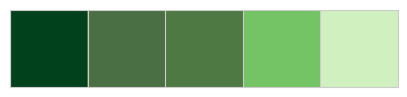

In [ ]:
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_green)

### 2.5.1.Density Plot

**Q. Is there any clustering of the sneaker's sales price?**

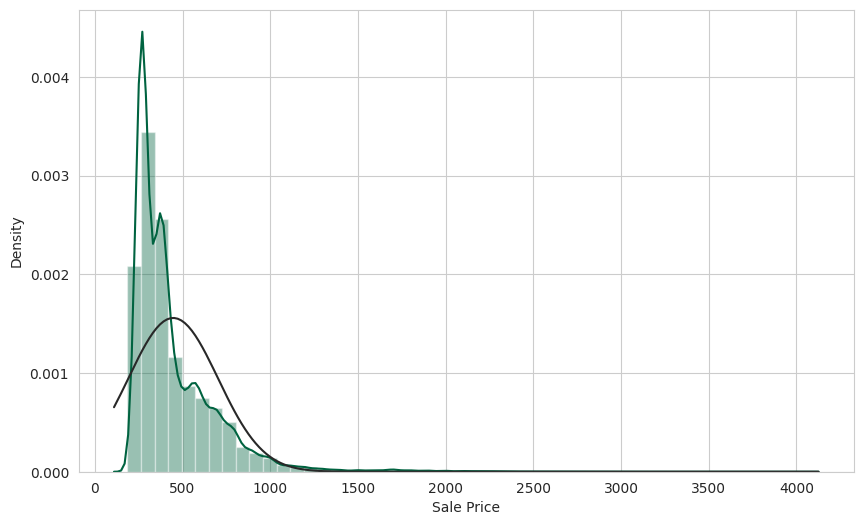

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Sale Price'], fit = norm, color = '#006340')
plt.show()

**Obervation**

It can be seen most of the sneakers sales prices are concentrated between ~100USD and 500USD, reaching a max around 300USD.

### 2.5.2. Scatter Plot

**Q. Does the difference between sneaker's order date and relese date have any impact on the Sale Price?**

Number of shoes with more than 550 days between Order and Release: 13433
Percentage of total: 13.44%


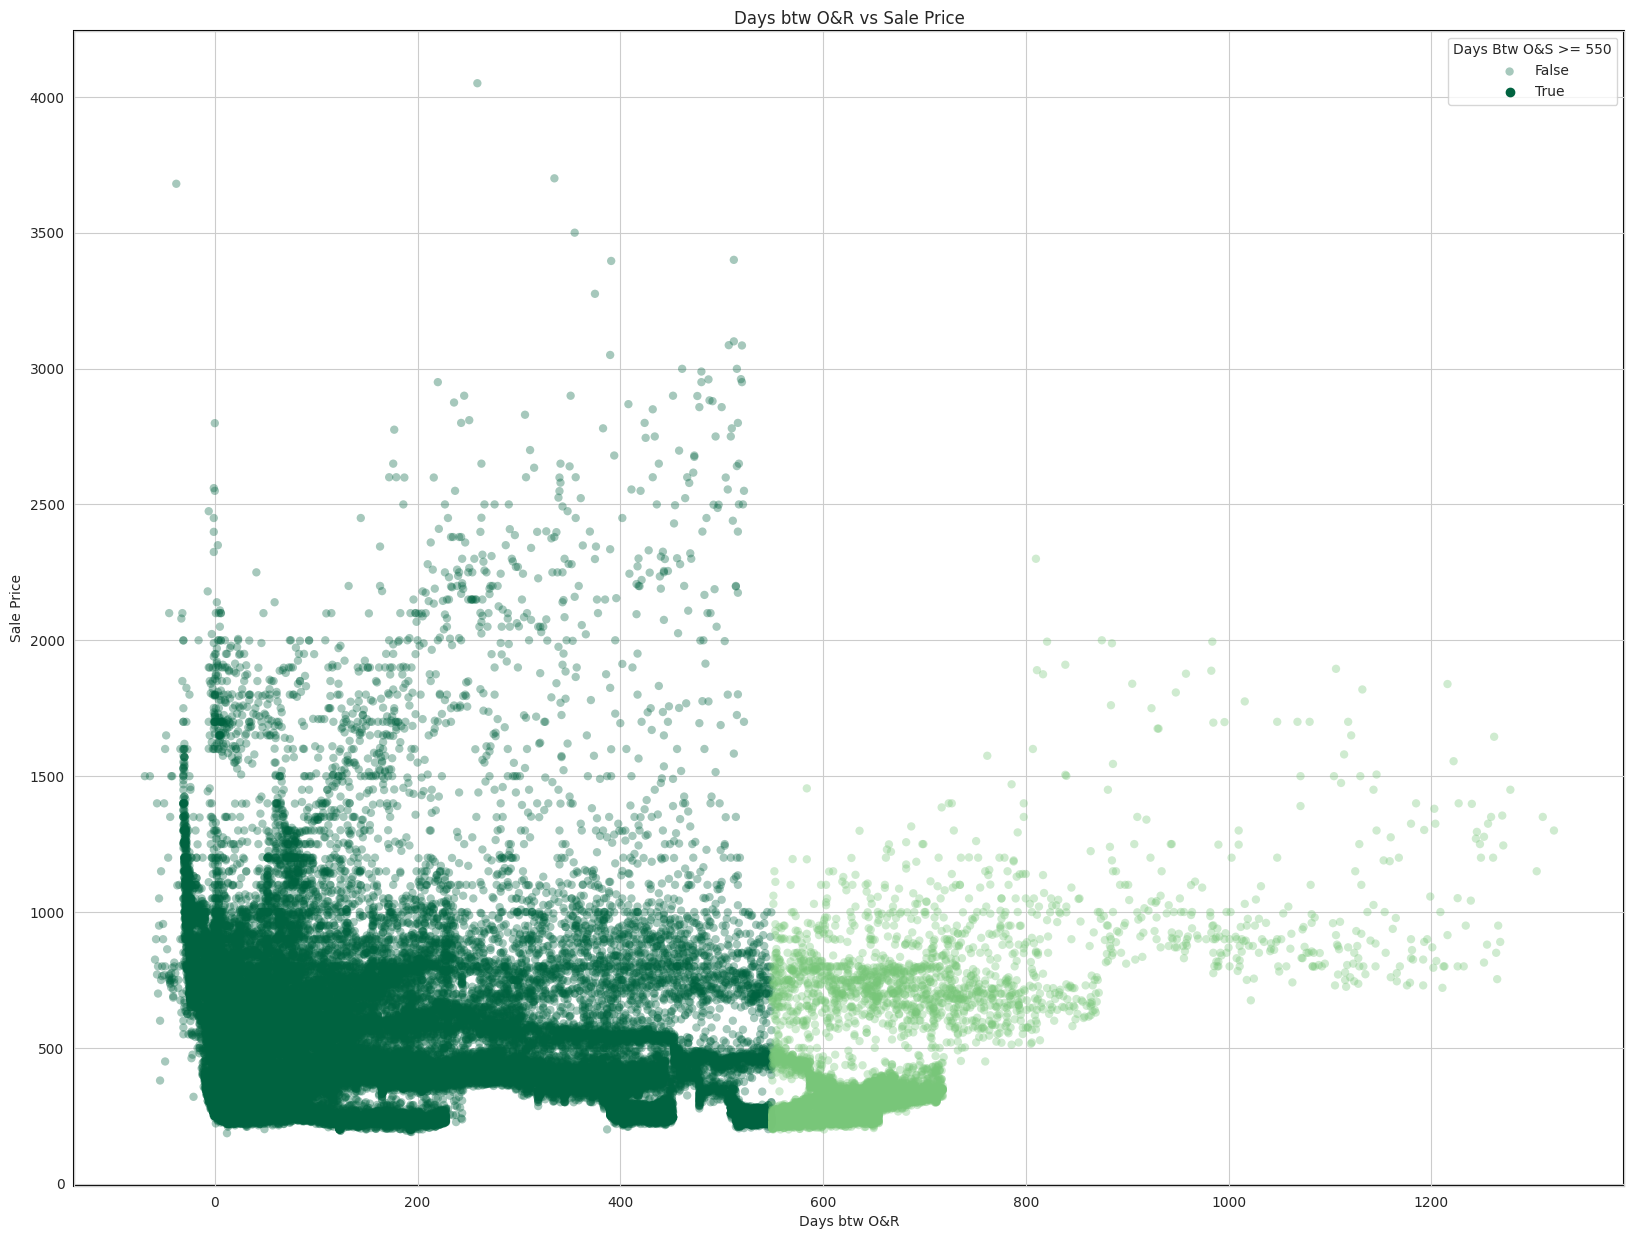

In [ ]:
# Function for visualizing numerical variables against SalePrice, scatterplot
plt.figure(figsize=[20,15])
def scatter_plot(x):
    ax = sns.scatterplot(x=df[x], y=df['Sale Price'], alpha=0.35, linewidth=0, hue = df[x]>=550, palette={True: '#78C679', False: '#006340'})
    legend = ax.legend(title='Days Btw O&S >= 550', labels=['False', 'True'])
    ax.set_title('{} vs Sale Price'.format(x), fontsize=12, pad=5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
scatter_plot('Days btw O&R')
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Release Date'] = pd.to_datetime(df['Release Date'], dayfirst=True)
df['Days_Between'] = (df['Order Date'] - df['Release Date']).dt.days
shoes_over_500_days = df[df['Days_Between'] > 550]
number_of_shoes = len(shoes_over_500_days)
total_shoes = len(df)
percentage = (number_of_shoes / total_shoes) * 100
print(f"Number of shoes with more than 550 days between Order and Release: {number_of_shoes}")
print(f"Percentage of total: {percentage:.2f}%")
plt.xlabel('Days btw O&R')
plt.ylabel('Sale Price')
plt.show()


**Observation**

From this visualization, we can see the following key insisghts:

1. About 87% of the sneakers were sold before 550 days after the order date.
2. Within this 87%, it's observed that prices tend to increase as the number of days between the order and release date increases.
3. Most sneakers are sold before 250 days, but the general trend still shows that longer intervals between order and release are associated with higher sales prices.

These observations suggest that there is a positive relationship between the time it takes for sneakers to be sold and their sale price. In other words, sneakers that are sold further from their order date tend to command higher prices.

### 2.5.3. Bar Plot

**Q. Which size was the most popular?**


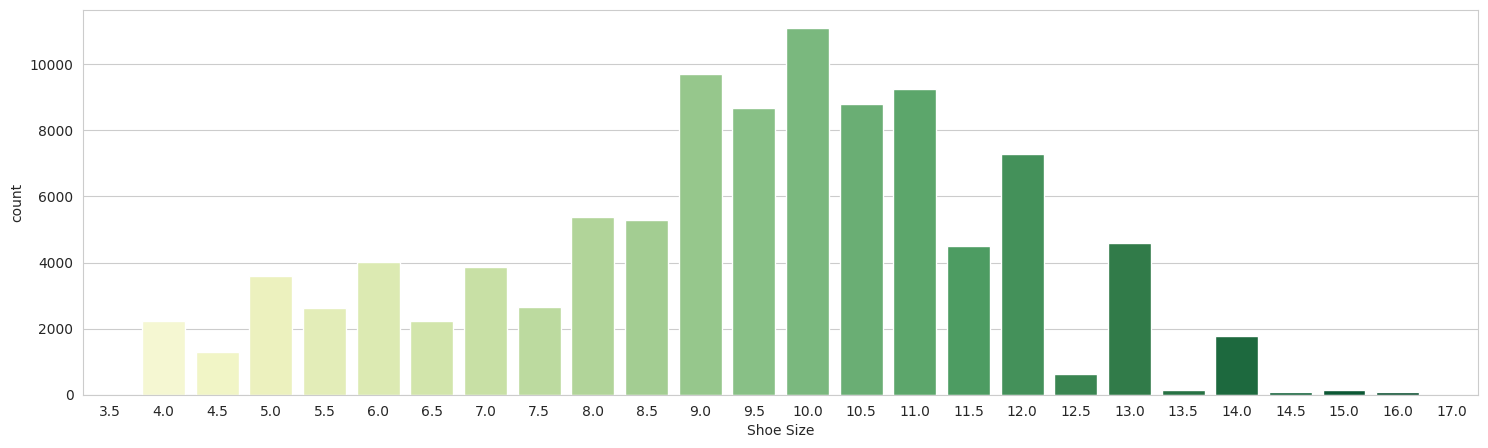

In [ ]:
# Count plot of Shoe Size
plt.figure(figsize=(18, 5))
sns.countplot(x = 'Shoe Size',
              data = df,
              palette = 'YlGn'
              )
plt.show()

**Observation**

Sizes 9 to 11 have the highest transaction volume, indicating their popularity among buyers. The most demanded size is 10 with more than 10,000 pairs sold. This suggests that sneakers falling within this size range are in greater demand.

### 2.5.4. Bar Plot

**Q. Which size/style could command the highest price?**

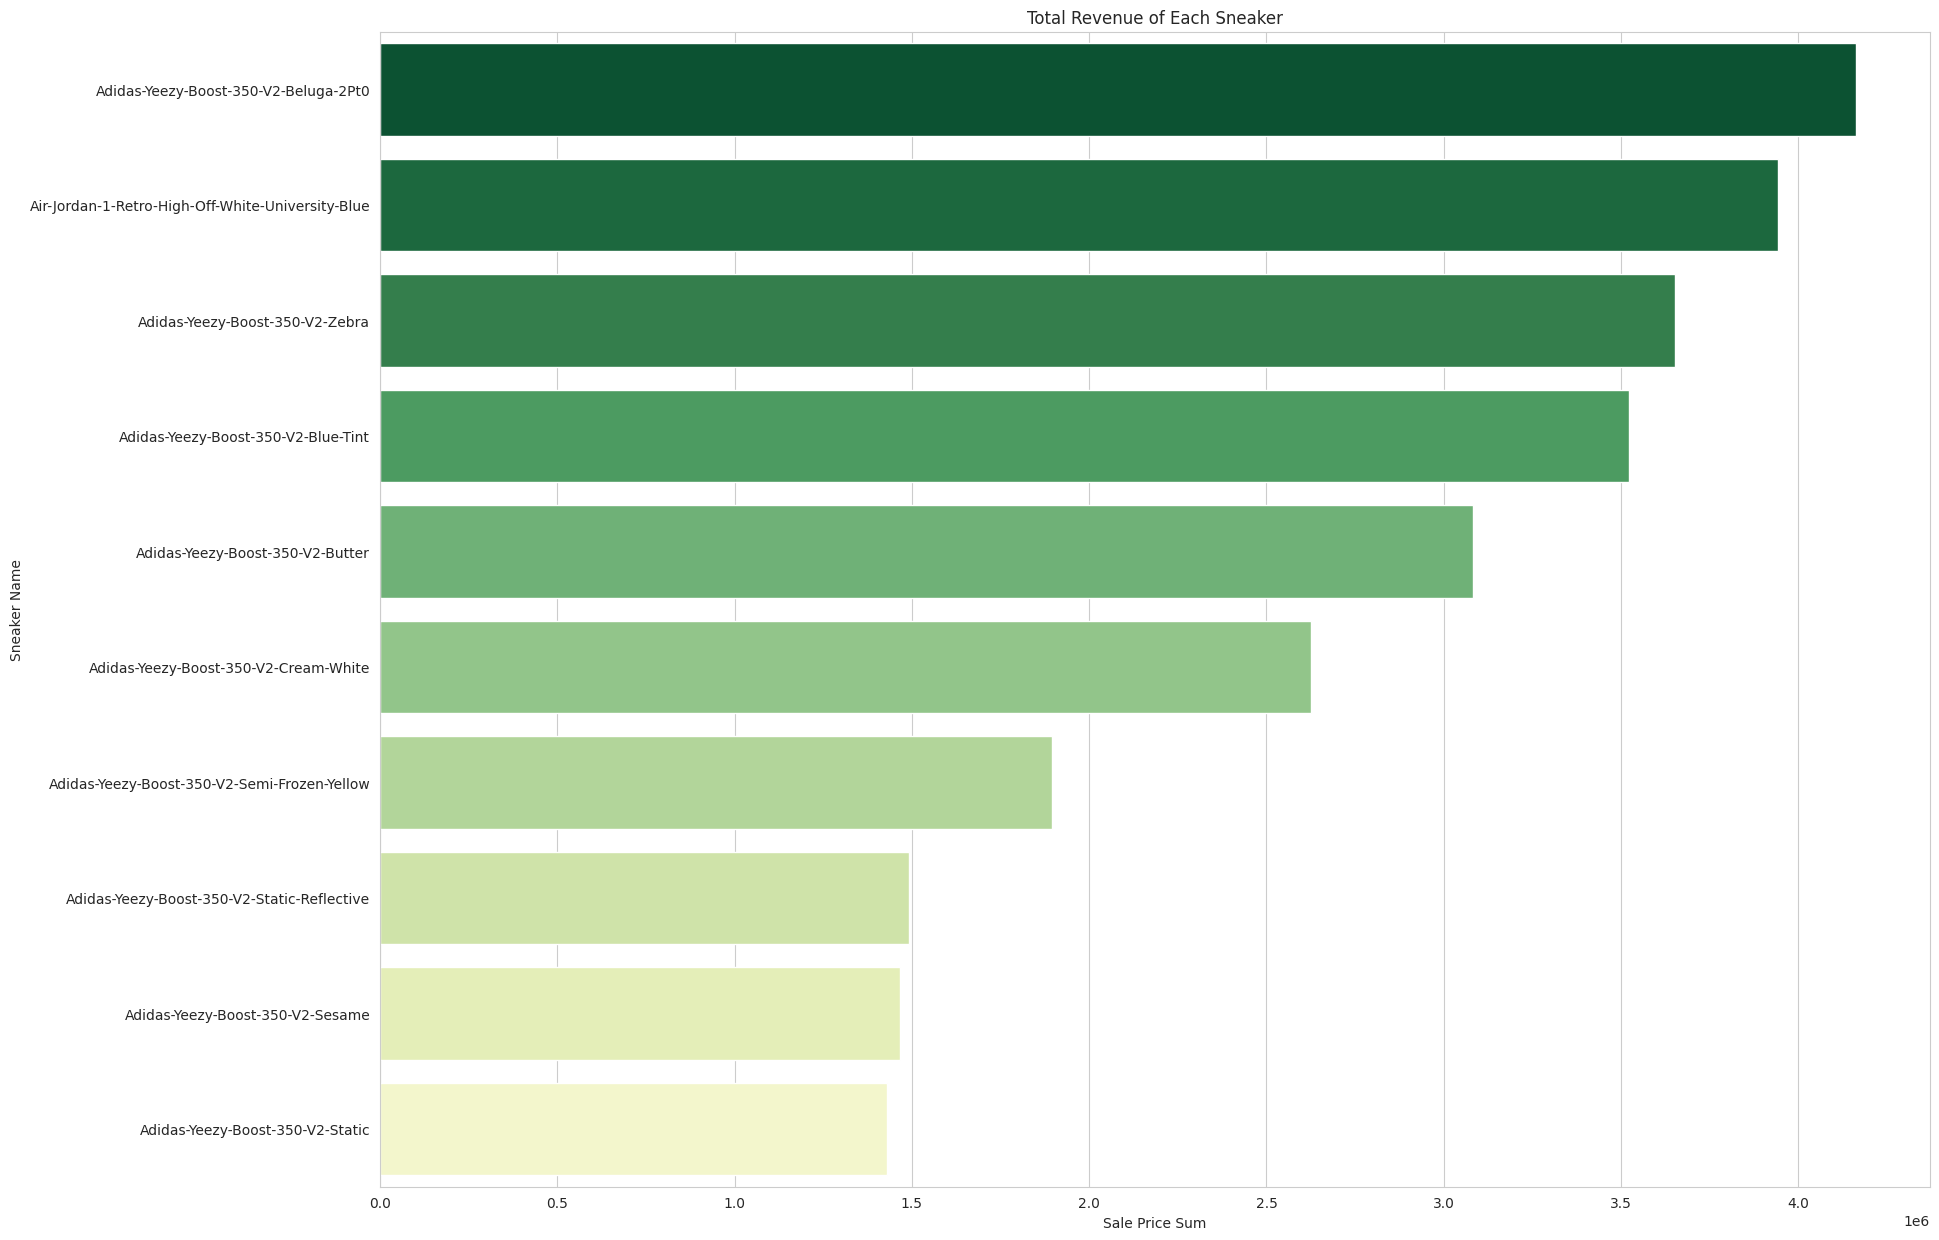

In [ ]:
item_sales_sum = df.groupby('Sneaker Name')['Sale Price'].sum().reset_index()
sorted_item_sales_sum = item_sales_sum.sort_values(by='Sale Price', ascending=False)
top_10_items = sorted_item_sales_sum.head(10)
plt.figure(figsize=[20,15])
sns.barplot(x='Sale Price', y='Sneaker Name', data=top_10_items, palette='YlGn_r')
plt.xlabel('Sale Price Sum')
plt.ylabel('Sneaker Name')
plt.title('Total Revenue of Each Sneaker')
plt.show()



**Observation**

It's evident that the Adidas Yeezy Boost 350 stands out with the highest total Sale Price when compared to other models. Furthermore, in terms of popularity, the majority of sneakers sold were Adidas Yeezy models, with one exception, the Nike Off-White, specifically the Air Jordan 1 Retro High Off-White University Blue.



### 2.5.5. Bar Plot

**Q. Is there any preferred state to the sneakers resale market?**

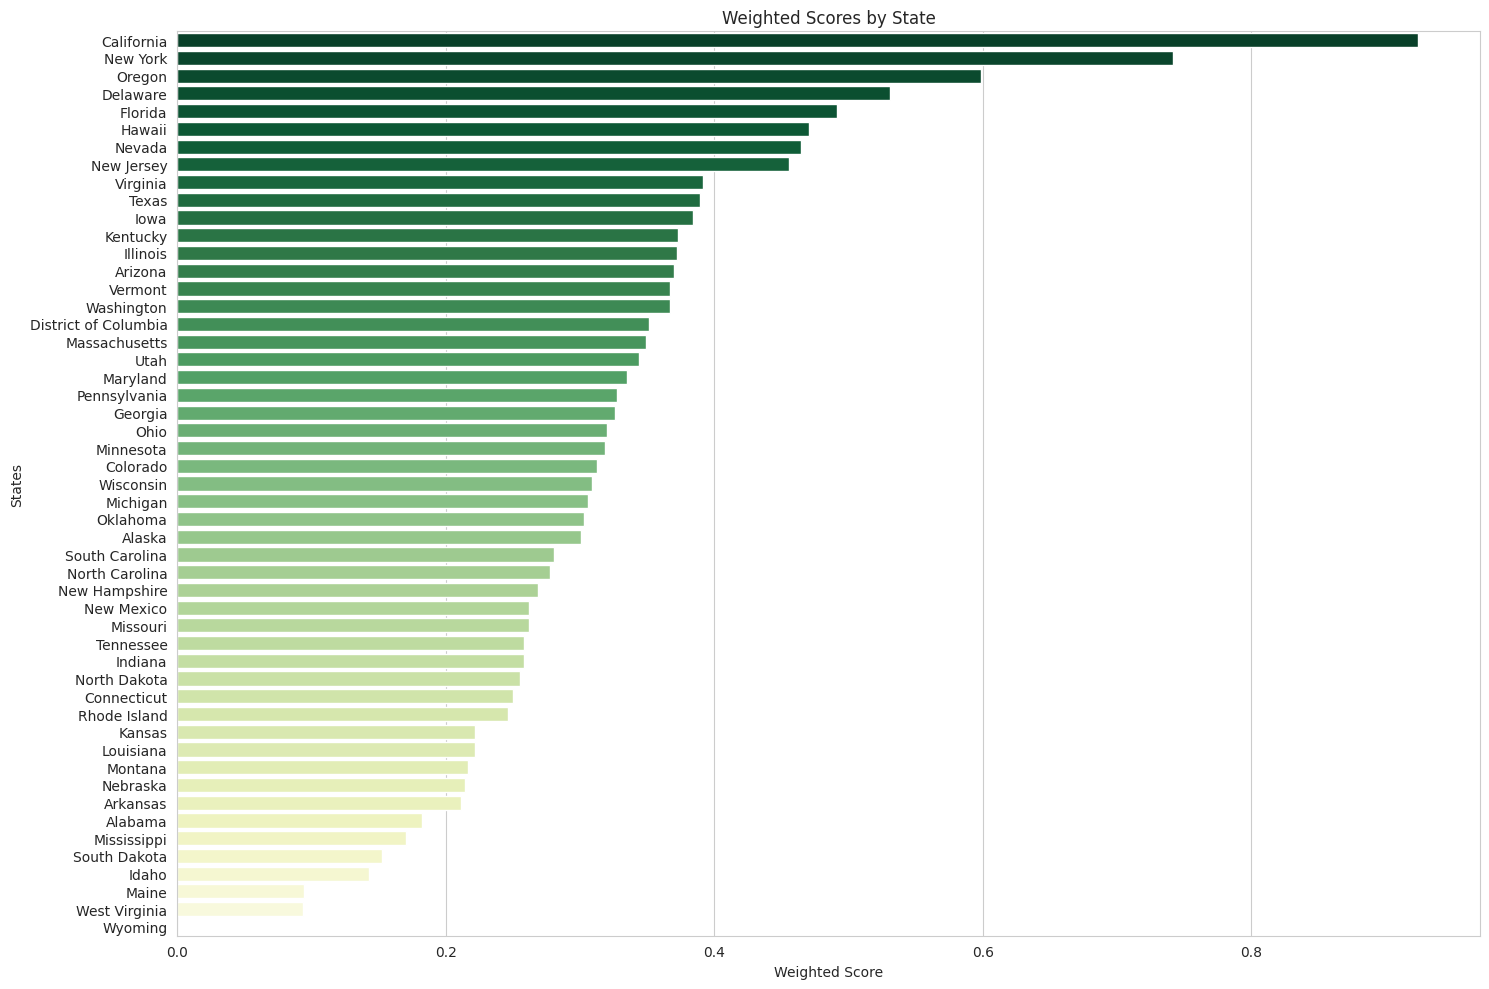

In [ ]:
# Count the number of sales for each state/region
sales_counts = df['Buyer Region'].value_counts().reset_index()

# Rename the columns
sales_counts.columns = ['States', 'Number of Sales']

# Add a 'Rank based on Sales' column
sales_counts['Rank based on Sales'] = sales_counts['Number of Sales'].rank(ascending=False, method='min').astype(int)

# Aggregate data to get the total number of sales and the average price difference for each state
best_states = df.groupby('Buyer Region').agg({'Price Difference': 'mean', 'Sale Price': 'count'}).reset_index()
best_states.columns = ['States', 'Price Difference', 'Number of Sales']

# Normalizing Number of Sales and Price Difference
best_states['Normalized Sales'] = (best_states['Number of Sales'] - best_states['Number of Sales'].min()) / (best_states['Number of Sales'].max() - best_states['Number of Sales'].min())
best_states['Normalized Difference'] = (best_states['Price Difference'] - best_states['Price Difference'].min()) / (best_states['Price Difference'].max() - best_states['Price Difference'].min())

# Assuming equal weights for both Number of Sales and Price Difference.
weights = {'sales': 0.5, 'difference': 0.5}

# Compute Weighted Score
best_states['Weighted Score'] = weights['sales'] * best_states['Normalized Sales'] + weights['difference'] * best_states['Normalized Difference']

# Rank states based on Weighted Score
best_states['Rank'] = best_states['Weighted Score'].rank(ascending=False)

# Sort by rank and view the DataFrame
ranked_states = best_states.sort_values('Rank')
# print(ranked_states[['States', 'Number of Sales', 'Price Difference', 'Weighted Score']])

# Visualization
plt.figure(figsize=(15, 10))
sns.barplot(x='Weighted Score', y='States', data=ranked_states, palette='YlGn_r')
plt.xticks(rotation=0)
plt.title('Weighted Scores by State')
plt.ylabel('States')
plt.xlabel('Weighted Score')
plt.tight_layout()
plt.show()

**Observation**

To determine if there is a preferred state for selling sneakers, we initially normalized both the Sales and Price Difference. We then assigned equal weights to both the Number of Sales and Price Difference.

In the end, it becomes evident that there are a few favored states in the resale market. California stands out as the most concentrated, followed by New York, Oregon, and Delaware.

### 2.5.6. Box Plot

**Q. Is there any particularity in the distribution of the sales price for each of the sneaker models, Yeezy and Off - White?**

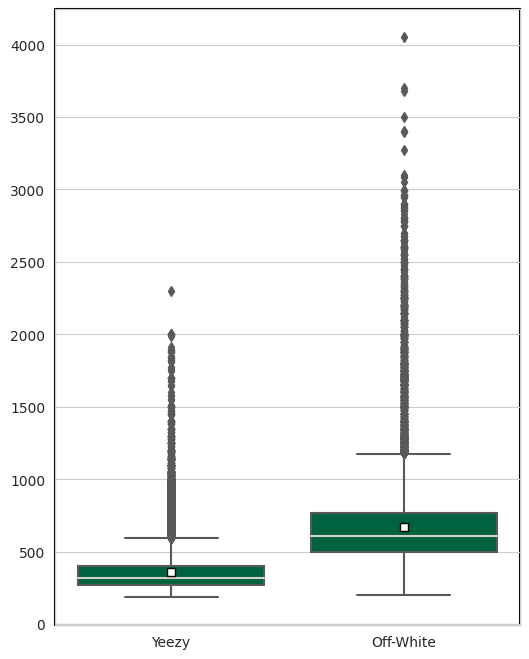

In [ ]:
# Features to visualize using boxplot
cols = ['Brand', 'Retail Price', 'Shoe Size', 'Sneaker Name', 'Buyer Region']

# Calculate the median of 'SalePrice' for each category in each categorical feature
medians = {}
for col in cols:
    medians[col] = df.groupby(col)['Sale Price'].median()

# Sort the categorical features based on the mean of 'SalePrice'
sorted_categories = {col: sorted(df[col].unique(), key=lambda x: medians[col][x]) for col in cols}

# Function for visualizing discrete/categorical variables against SalePrice, boxplot
def box_plot(x, y):

    ax = sns.boxplot(x=df[x],
                     y=df[y],
                     order = sorted_categories[x],
                     palette = 'Set2',
                     showmeans = True,
                     meanprops = {"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"},
                     boxprops = {"facecolor": "#006340"},
                     medianprops = {"color": "#D4D1C7"})

    # ax.set_title('{} vs Sale Price'.format(x), fontsize=16, pad=5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

# Brand v.s. Sale Price
plt.figure(figsize=[6, 8])
box_plot('Brand', 'Sale Price')
plt.show()

### 2.5.7. Box Plot

**Q. How did the profits look like for different show sizes?**

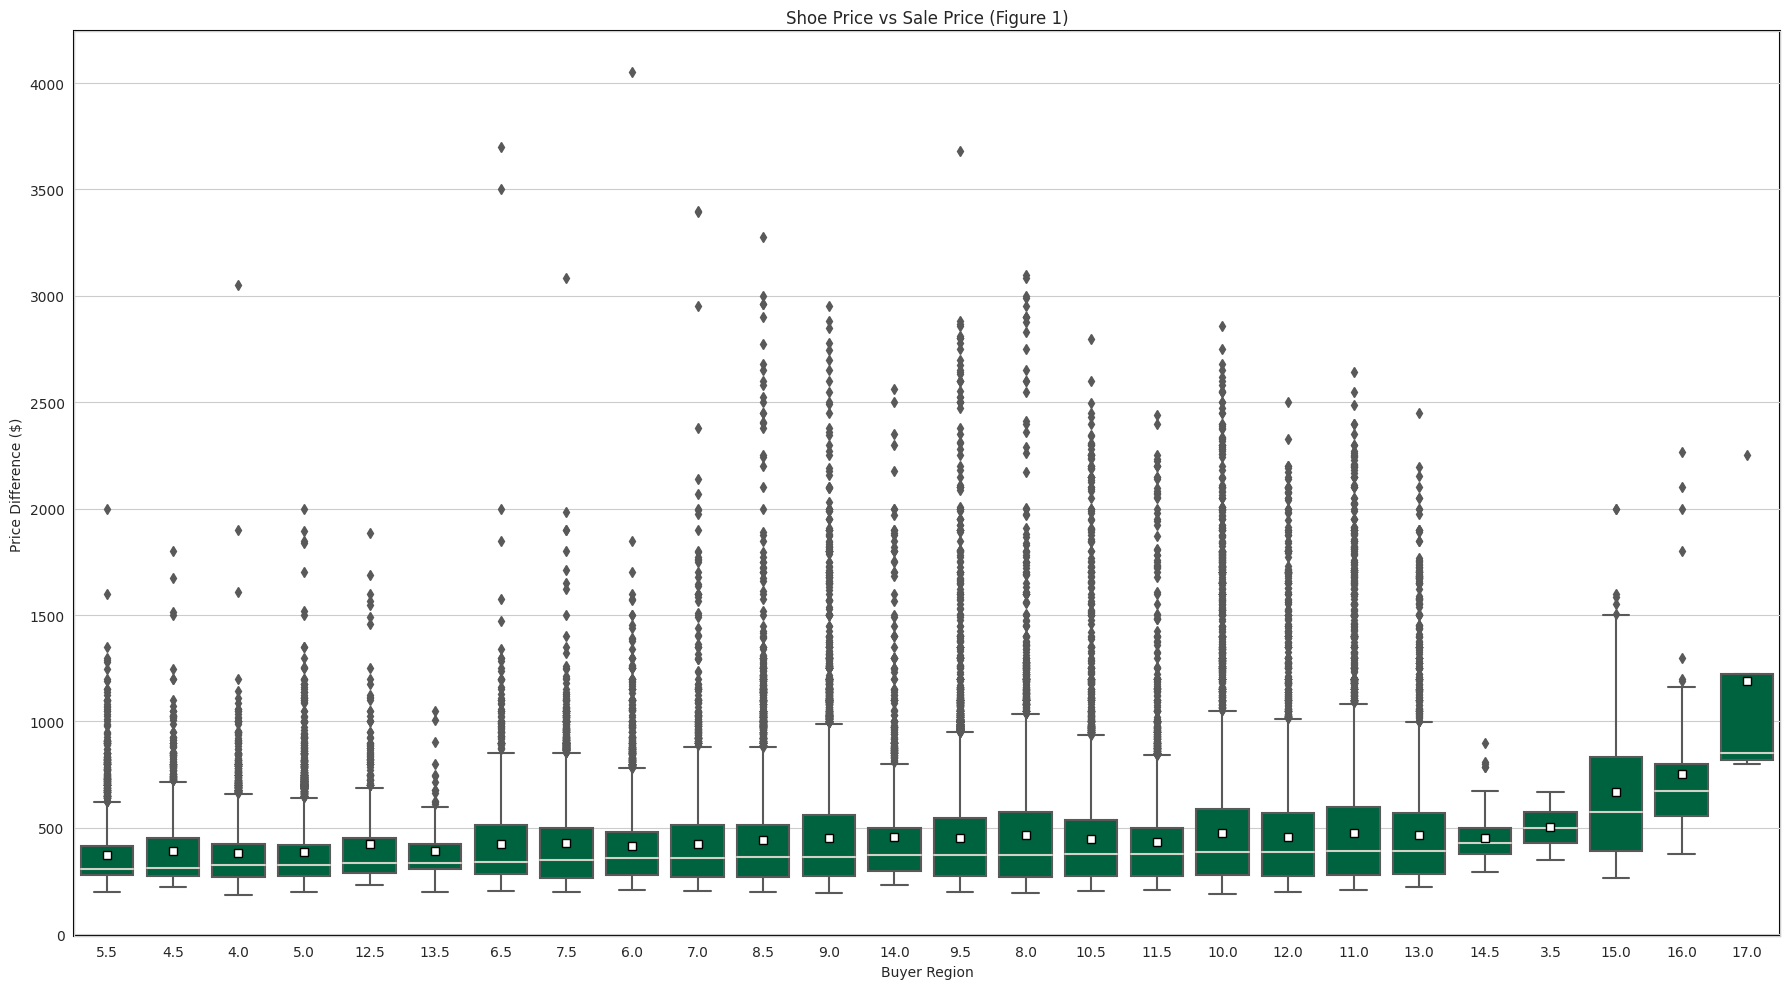

In [ ]:
# Shoe Size v.s. Sale Price
plt.figure(figsize=[18, 10])
box_plot('Shoe Size', 'Sale Price')
plt.title('Shoe Price vs Sale Price (Figure 1)')

plt.ylabel('Price Difference ($)')
plt.xlabel('Buyer Region')
plt.tight_layout()
plt.show()

**Observation**

Profits were generally higher for shoes sizes ranging from 8 to 11.\
The highest profit was recorded for a shoe of size 6.\
Sizes 15, 16 and 17 had a higher median profit compared to the rest of the shoe sizes but that was mainly because they formed a very small percentage of the total shoes sold.

### 2.5.8. Box Plot

**Q. Which regions recorded the highest profits from the sneaker resale?**

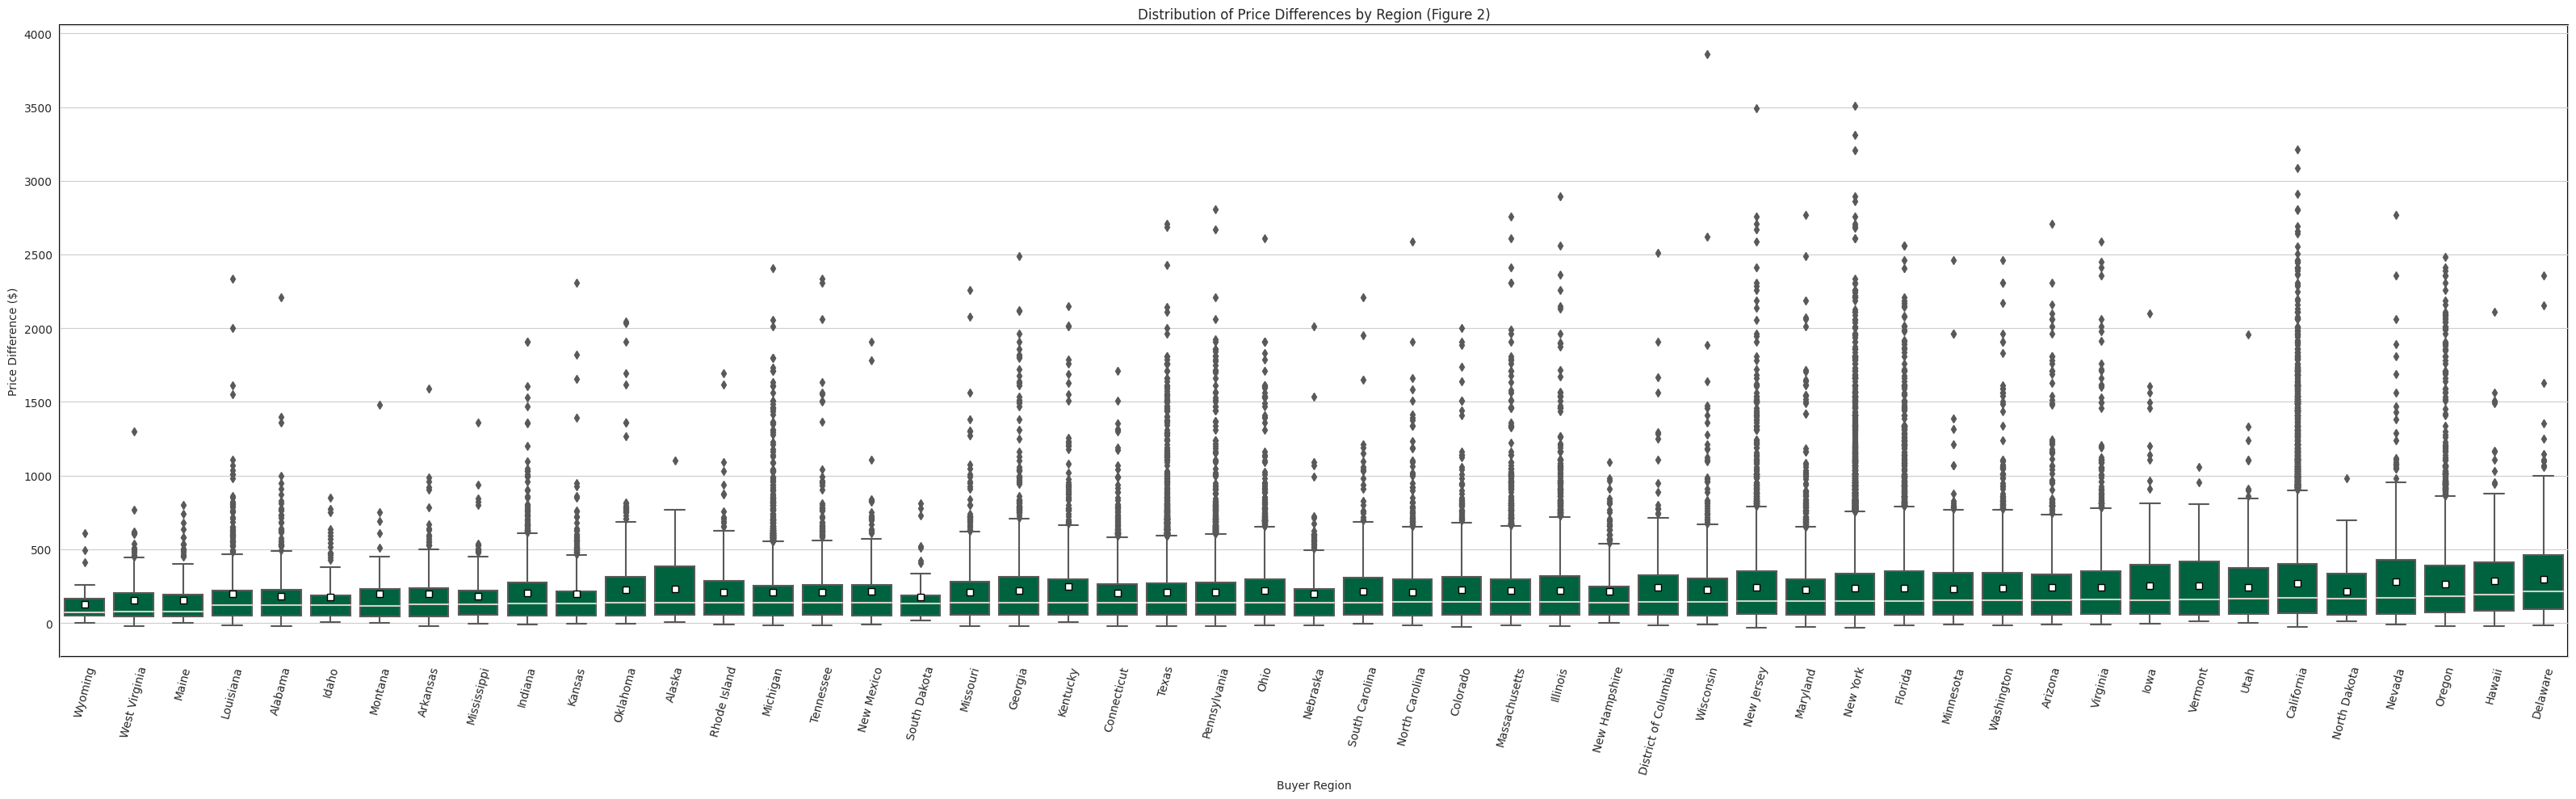

In [ ]:
# Boxplot to visualize distribution of price differences by region
plt.figure(figsize=(32, 10))
box_plot('Buyer Region', 'Price Difference')
plt.xticks(rotation=75)
plt.title('Distribution of Price Differences by Region (Figure 2)')

plt.ylabel('Price Difference ($)')
plt.xlabel('Buyer Region')
plt.tight_layout()
plt.show()

**Observation**

Delaware, Hawaii and Oregon recorded the highest median profits from the sales.\
It can also be noted that California and New York have a large number of outliers.

In [ ]:
# Create a new column for the difference between sale and retail price
df['Price Difference'] = df['Sale Price'] - df['Retail Price']

# Calculate mean and median price difference by region
premium_stats = df.groupby('Buyer Region')['Price Difference'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

premium_stats.head()

,mean,median
Buyer Region,,
Delaware,297.650968,216.0
Hawaii,284.449086,195.0
Nevada,278.811392,170.5
California,271.426682,170.0
Oregon,263.409815,183.0




We added a new column to quantify the difference between the sale price and the retail price of sneakers, allowing us to determine the markup or markdown for each sneaker sale.Subsequently, we'll compute the average markup (or markdown) per region. This analysis sheds light on which regions, on average, experience sneakers being sold with higher markups above their retail prices and the extent of that increase

### 2.5.9. Choropleth Map

**Q. How are different states contributing to the total sales?**

In [ ]:
# Dictionary for Mapping
state_code_mapping = {
    'California': 'CA',
    'New York': 'NY',
    'Oregon': 'OR',
    'Florida': 'FL',
    'Texas': 'TX',
    'New Jersey': 'NJ',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Virginia': 'VA',
    'Ohio': 'OH',
    'Maryland': 'MD',
    'Washington': 'WA',
    'Georgia': 'GA',
    'Arizona': 'AZ',
    'North Carolina': 'NC',
    'Delaware': 'DE',
    'Connecticut': 'CT',
    'Indiana': 'IN',
    'Colorado': 'CO',
    'Wisconsin': 'WI',
    'Nevada': 'NV',
    'Tennessee': 'TN',
    'Minnesota': 'MN',
    'Missouri': 'MO',
    'South Carolina': 'SC',
    'Louisiana': 'LA',
    'Kentucky': 'KY',
    'Iowa': 'IA',
    'Alabama': 'AL',
    'Utah': 'UT',
    'Oklahoma': 'OK',
    'Hawaii': 'HI',
    'Rhode Island': 'RI',
    'Kansas': 'KS',
    'District of Columbia': 'DC',
    'Nebraska': 'NE',
    'New Hampshire': 'NH',
    'New Mexico': 'NM',
    'Arkansas': 'AR',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Maine': 'ME',
    'Idaho': 'ID',
    'Vermont': 'VT',
    'North Dakota': 'ND',
    'Alaska': 'AK',
    'South Dakota': 'SD',
    'Montana': 'MT',
    'Wyoming': 'WY'
}

# Mapping
df['State Code'] = df['Buyer Region'].map(state_code_mapping)

# Move 'Sale Price' to the last column
df['Sale Price'] = df.pop('Sale Price')

# Create 'Year' Col
df['Order Year'] = df['Order Date'].dt.year

df.head()

,Order Date,Release Date,Days btw O&R,Brand,Sneaker Name,Retail Price,Shoe Size,Buyer Region,Price Difference,Days_Between,State Code,Sale Price,Order Year
0,2017-09-01,2016-09-24,342,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,11.0,California,877.0,342,CA,1097.0,2017
1,2017-09-01,2016-11-23,282,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,220,11.0,California,465.0,282,CA,685.0,2017
2,2017-09-01,2016-11-23,282,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,220,11.0,California,470.0,282,CA,690.0,2017
3,2017-09-01,2016-11-23,282,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,220,11.5,Kentucky,855.0,282,KY,1075.0,2017
4,2017-09-01,2017-02-11,202,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,220,11.0,Rhode Island,608.0,202,RI,828.0,2017


In [ ]:
# Calculate aggregate sale price of each state
result1 = df.groupby(['State Code', 'Order Year'])['Sale Price'].sum().reset_index()

# Create a dataframe for 'State Code' & 'Total Sale Price'
df_map1 = pd.DataFrame({
    'State Code': result1['State Code'],
    'Year': result1['Order Year'],
    'Total Sales': result1['Sale Price']
})

df_map1.head()

,State Code,Year,Total Sales
0,AK,2017,4273.0
1,AK,2018,20309.0
2,AK,2019,1978.0
3,AL,2017,33574.0
4,AL,2018,117312.0


In [ ]:
result2 = df_map1.groupby('State Code')['Total Sales'].sum().reset_index()
df_map2 = pd.DataFrame({
    'State Code': result2['State Code'],
                        'Total Sales': result2['Total Sales']
})
df_map2.head()

,State Code,Total Sales
0,AK,2.656000e+04
1,AL,1.809070e+05
2,AR,7.056000e+04
3,AZ,6.278063e+05
4,CA,9.253625e+06


In [ ]:
fig2 = go.Figure(data=go.Choropleth(
    locations=df_map2['State Code'],
    z=df_map2['Total Sales'],
    locationmode='USA-states',
    colorscale='YlGn',
    marker_line_color='silver',
    colorbar_title = 'Total Sales'
))


fig2.update_layout(
    title='All Years',
    title_x=0.5,
    geo = dict(
        showcoastlines = False,
        showframe = False,
        center=dict(lon=-110, lat=48),
        projection_scale=2.5
        )
)

fig2.show()

**Observation**

Most of the sales are concentrated in California and New York. Oregon Florida and Texas also have a higher number of sales. We can clearly see that the East and the West coast are contributing the most to the sales.


### 2.5.10. Choropleth Map

In [ ]:
fig1 = px.choropleth(df_map1,
                    locations='State Code',
                    locationmode="USA-states",
                    color= 'Total Sales',
                    scope="usa",
                    facet_col = 'Year',
                    color_continuous_scale='YlGn',

                    )

fig1.show()

California and New York are the standout states in terms of cumulative purchases and demand for these sneakers within the dataset. These states exhibit robust market demand, reflecting the popularity of these brands in specific regions.

### 2.5.11. Heatmap

**Q Which sneakers have the highest sales in a particular region**

In [ ]:
# Create pivot table
pivot_table = df.pivot_table(index='Buyer Region', columns='Sneaker Name', values='Sale Price', aggfunc='count').fillna(0)
# Calculate the desired height based on the number of rows
height_per_row = 20
total_height = len(pivot_table.index) * height_per_row + 200
# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='YlGn',
    hoverongaps = False
))
fig.update_layout(
    title='Concentration of Sales: Buyer Region vs Sneaker Name',
    xaxis_nticks=len(pivot_table.columns),
    yaxis_nticks=len(pivot_table.index),
    height=total_height
)
fig.show()

**Observation**

The Adidas-Yeezy-Boost-350-V2-Beluga-2pt0 had the highest number of sales in California. This was also the highest for any individual sneaker in any state.\
Adidas-Yeezy-Boost-350-V2-Blue-Tint, Adidas-Yeezy-Boost-350-V2-Cream-White, Adidas-Yeezy-Boost-350-V2-Zebra and Adidas-Yeezy-Boost-350-V2-Butter were among the popular ones in different states.

### 2.5.12. Line Chart

**Q. What is the trend in resale prices for Off-White x Nike and Yeezy 350 sneakers over the analyzed period, and how do they compare?**


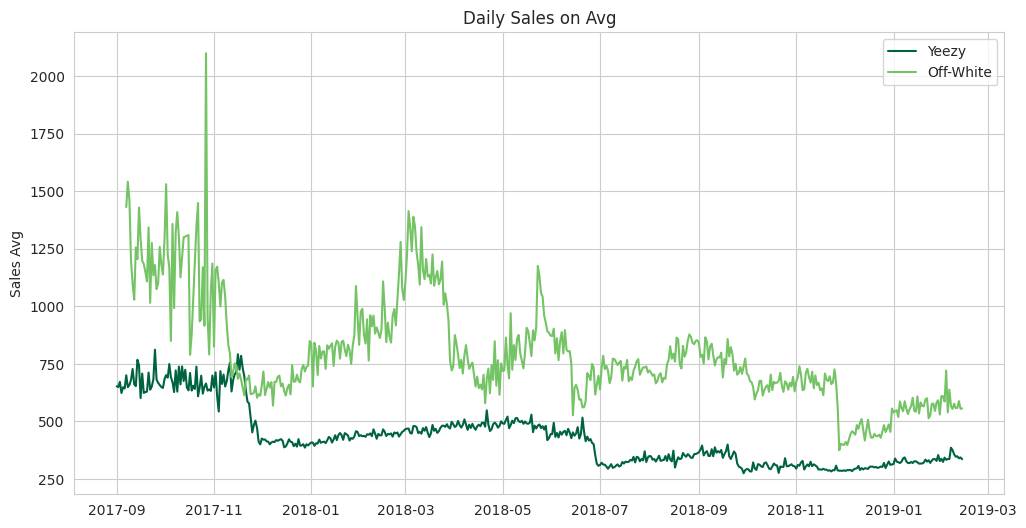

In [ ]:
# Convert the "Order Date" column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')

df_yeezy = df[df['Brand'] == 'Yeezy']
df_Off_White = df[df['Brand'] == 'Off-White']

# Plot the total sales over time
daily_avg_yeezy = df_yeezy.groupby('Order Date')['Sale Price'].mean()
daily_avg_Off_White = df_Off_White.groupby('Order Date')['Sale Price'].mean()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_yeezy.index, daily_avg_yeezy.values, color='#006340', linestyle='-', markersize=5, label='Yeezy')
plt.plot(daily_avg_Off_White.index, daily_avg_Off_White.values, color='#74C365', linestyle='-', markersize=5, label='Off-White')
plt.xlabel('')
plt.ylabel('Sales Avg')
plt.title('Daily Sales on Avg')
plt.grid(True)
plt.legend()

plt.show()

For Off-White, there was a sudden spike in November 2017 and subsequent spikes in March 2018 and June 2018.\
For Yeezy, the sales tend to remain stable with an overall decrease with time.

What is interesting to note is that in both the sneakers there was a sudden drop in sales at the same time, in mid November, 2018.

### 2.5.13. Bar Chart

**Q. Are there regional variations in the resale prices of Off-White x Nike and Yeezy 350 sneakers, and if so, which regions have the highest and lowest resale prices?**

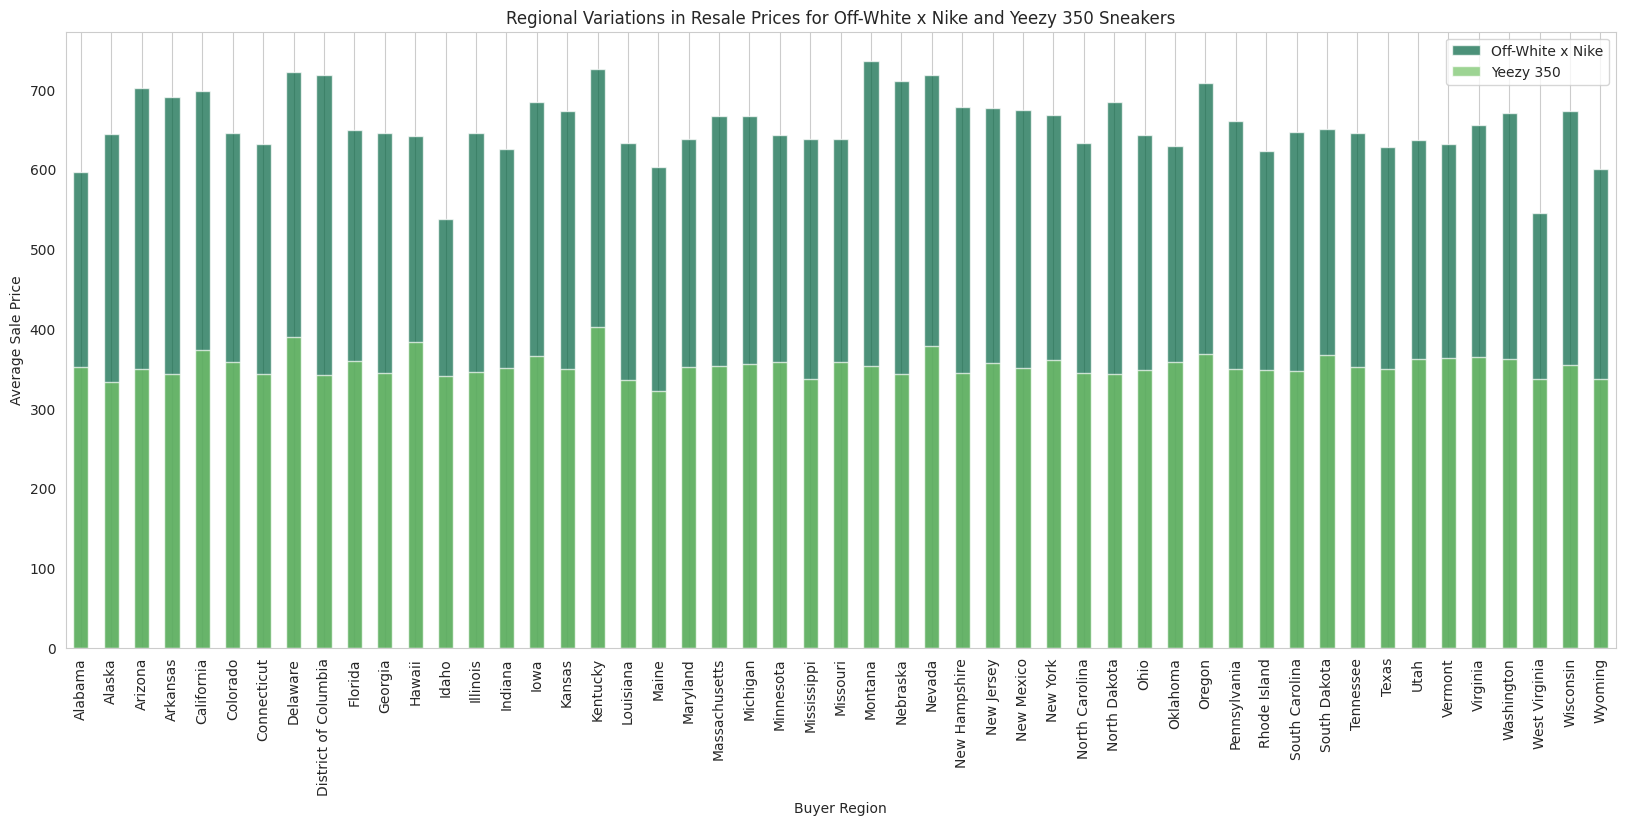

In [ ]:
# Filter data for Off-White x Nike and Yeezy 350 separately

plt.figure(figsize=(20,8))
off_white_data = data[data['Brand'] == 'Off-White']
yeezy_data = data[data['Brand'] == ' Yeezy']

# Group and calculate the average resale price by region
off_white_avg_prices = off_white_data.groupby('Buyer Region')['Sale Price'].mean()
yeezy_avg_prices = yeezy_data.groupby('Buyer Region')['Sale Price'].mean()

# Check if there is data for Off-White
if not off_white_avg_prices.empty:
    off_white_avg_prices.plot(kind='bar', label='Off-White x Nike', alpha=0.7, color="#006340")

# Check if there is data for Yeezy
if not yeezy_avg_prices.empty:
    yeezy_avg_prices.plot(kind='bar', label='Yeezy 350', alpha=0.7, color="#74C365")

plt.title('Regional Variations in Resale Prices for Off-White x Nike and Yeezy 350 Sneakers')
plt.xlabel('Buyer Region')
plt.ylabel('Average Sale Price')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

**Observation**

To answer this question, we are creating a bar chart to visualize regional variations in resale prices for Off-White x Nike and Yeezy 350 sneakers. The x-axis or represents the different U.S. states (Buyer Region), and the y-axis  represents the average resale price. By using color-coding or bar lengths, we can identify which regions have the highest and lowest resale prices for these sneakers. This analysis can help potential investors and retailers understand where the market is most lucrative and where it might be more competitive.

#3. Modeling

In [ ]:
# Download file using url
import urllib.request
file_url = 'https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019-3.xlsx'
urllib.request.urlretrieve(file_url, 'StockX-Data-Contest-2019-3.xlsx')

('StockX-Data-Contest-2019-3.xlsx',
 <http.client.HTTPMessage at 0x7b7f2d46fc40>)

In [ ]:
data = pd.read_excel('/content/StockX-Data-Contest-2019-3.xlsx', sheet_name = 'Raw Data')

In [ ]:
# Show all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df = data.copy()

## 3.1. Preprocess the Data

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Convert dtype
df['Shoe Size'] = df['Shoe Size'].astype(object)
df['Retail Price'] = df['Retail Price'].astype(object)

# Create 'Days btw O&R' by subtracting
df['Days btw O&R'] = df['Order Date'] - df['Release Date']
df['Days btw O&R'] = df['Days btw O&R'].dt.days.astype(int)

# df['Order_year'] = df['Order Date'].dt.year.astype(object)
# df['Order_month'] = df['Order Date'].dt.month.astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97116 entries, 0 to 99955
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    97116 non-null  datetime64[ns]
 1   Brand         97116 non-null  object        
 2   Sneaker Name  97116 non-null  object        
 3   Sale Price    97116 non-null  float64       
 4   Retail Price  97116 non-null  object        
 5   Release Date  97116 non-null  datetime64[ns]
 6   Shoe Size     97116 non-null  object        
 7   Buyer Region  97116 non-null  object        
 8   Days btw O&R  97116 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 7.4+ MB


In [ ]:
# Binary mapping for 'Brand'
df['Brand'] = df['Brand'].map({' Yeezy': 0, 'Off-White': 1})

In [ ]:
# Nominal features
nomin_features = ['Buyer Region', 'Retail Price', 'Shoe Size', 'Sneaker Name']

# Perform one-hot encoding to nominal features
df_dummy = pd.get_dummies(df[nomin_features], drop_first = True)
df_dummy.head()

,Buyer Region_Alaska,Buyer Region_Arizona,Buyer Region_Arkansas,Buyer Region_California,Buyer Region_Colorado,Buyer Region_Connecticut,Buyer Region_Delaware,Buyer Region_District of Columbia,Buyer Region_Florida,Buyer Region_Georgia,Buyer Region_Hawaii,Buyer Region_Idaho,Buyer Region_Illinois,Buyer Region_Indiana,Buyer Region_Iowa,Buyer Region_Kansas,Buyer Region_Kentucky,Buyer Region_Louisiana,Buyer Region_Maine,Buyer Region_Maryland,Buyer Region_Massachusetts,Buyer Region_Michigan,Buyer Region_Minnesota,Buyer Region_Mississippi,Buyer Region_Missouri,Buyer Region_Montana,Buyer Region_Nebraska,Buyer Region_Nevada,Buyer Region_New Hampshire,Buyer Region_New Jersey,Buyer Region_New Mexico,Buyer Region_New York,Buyer Region_North Carolina,Buyer Region_North Dakota,Buyer Region_Ohio,Buyer Region_Oklahoma,Buyer Region_Oregon,Buyer Region_Pennsylvania,Buyer Region_Rhode Island,Buyer Region_South Carolina,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming,Retail Price_150,Retail Price_160,Retail Price_170,Retail Price_190,Retail Price_200,Retail Price_220,Retail Price_250,Shoe Size_4.0,Shoe Size_4.5,Shoe Size_5.0,Shoe Size_5.5,Shoe Size_6.0,Shoe Size_6.5,Shoe Size_7.0,Shoe Size_7.5,Shoe Size_8.0,Shoe Size_8.5,Shoe Size_9.0,Shoe Size_9.5,Shoe Size_10.0,Shoe Size_10.5,Shoe Size_11.0,Shoe Size_11.5,Shoe Size_12.0,Shoe Size_12.5,Shoe Size_13.0,Shoe Size_13.5,Shoe Size_14.0,Shoe Size_14.5,Shoe Size_15.0,Shoe Size_16.0,Shoe Size_17.0,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,Sneaker Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Green,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Cream-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Sesame,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-University-Blue,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Black-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Volt,Sneaker Name_Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,Sneaker Name_Nike-Air-Max-90-Off-White,Sneaker Name_Nike-Air-Max-90-Off-White-Black,Sneaker Name_Nike-Air-Max-90-Off-White-Desert-Ore,Sneaker Name_Nike-Air-Max-97-Off-White,Sneaker Name_Nike-Air-Max-97-Off-White-Black,Sneaker Name_Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,Sneaker Name_Nike-Air-Max-97-Off-White-Menta,Sneaker Name_Nike-Air-Presto-Off-White,Sneaker Name_Nike-Air-Presto-Off-White-Black-2018,Sneaker Name_Nike-Air-Presto-Off-White-White-2018,Sneaker Name_Nike-Air-VaporMax-Off-White,Sneaker Name_Nike-Air-VaporMax-Off-White-2018,Sneaker Name_Nike-Air-VaporMax-Off-White-Black,Sneaker Name_Nike-Blazer-Mid-Off-White,Sneaker Name_Nike-Blazer-Mid-Off-White-All-Hallows-Eve,Sneaker Name_Nike-Blazer-Mid-Off-White-Grim-Reaper,Sneaker Name_Nike-Blazer-Mid-Off-White-Wolf-Grey,Sneaker Name_Nike-React-Hyperdunk-2017-Flyknit-Off-White,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Black,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Sneaker Name_Nike-Zoom-Fly-Off-White,Sneaker Name_Nike-Zoom-Fly-Off-White-Black-Silver,Sneaker Name_Nike-Zoom-Fly-Off-White-Pink,Sneaker Name_adidas-Yeezy-Boost-350-V2-Butter,Sneaker Name_a

In [ ]:
# Concat dummy features to df
df = pd.concat([df, df_dummy], axis = 1)

# Drop nominal features & Order Date
df = df.drop(nomin_features, axis = 1)
df = df.drop(['Order Date', 'Release Date'], axis = 1)

df.head()

,Brand,Sale Price,Days btw O&R,Buyer Region_Alaska,Buyer Region_Arizona,Buyer Region_Arkansas,Buyer Region_California,Buyer Region_Colorado,Buyer Region_Connecticut,Buyer Region_Delaware,Buyer Region_District of Columbia,Buyer Region_Florida,Buyer Region_Georgia,Buyer Region_Hawaii,Buyer Region_Idaho,Buyer Region_Illinois,Buyer Region_Indiana,Buyer Region_Iowa,Buyer Region_Kansas,Buyer Region_Kentucky,Buyer Region_Louisiana,Buyer Region_Maine,Buyer Region_Maryland,Buyer Region_Massachusetts,Buyer Region_Michigan,Buyer Region_Minnesota,Buyer Region_Mississippi,Buyer Region_Missouri,Buyer Region_Montana,Buyer Region_Nebraska,Buyer Region_Nevada,Buyer Region_New Hampshire,Buyer Region_New Jersey,Buyer Region_New Mexico,Buyer Region_New York,Buyer Region_North Carolina,Buyer Region_North Dakota,Buyer Region_Ohio,Buyer Region_Oklahoma,Buyer Region_Oregon,Buyer Region_Pennsylvania,Buyer Region_Rhode Island,Buyer Region_South Carolina,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming,Retail Price_150,Retail Price_160,Retail Price_170,Retail Price_190,Retail Price_200,Retail Price_220,Retail Price_250,Shoe Size_4.0,Shoe Size_4.5,Shoe Size_5.0,Shoe Size_5.5,Shoe Size_6.0,Shoe Size_6.5,Shoe Size_7.0,Shoe Size_7.5,Shoe Size_8.0,Shoe Size_8.5,Shoe Size_9.0,Shoe Size_9.5,Shoe Size_10.0,Shoe Size_10.5,Shoe Size_11.0,Shoe Size_11.5,Shoe Size_12.0,Shoe Size_12.5,Shoe Size_13.0,Shoe Size_13.5,Shoe Size_14.0,Shoe Size_14.5,Shoe Size_15.0,Shoe Size_16.0,Shoe Size_17.0,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,Sneaker Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Green,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Cream-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Sesame,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-University-Blue,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Black-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Volt,Sneaker Name_Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,Sneaker Name_Nike-Air-Max-90-Off-White,Sneaker Name_Nike-Air-Max-90-Off-White-Black,Sneaker Name_Nike-Air-Max-90-Off-White-Desert-Ore,Sneaker Name_Nike-Air-Max-97-Off-White,Sneaker Name_Nike-Air-Max-97-Off-White-Black,Sneaker Name_Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,Sneaker Name_Nike-Air-Max-97-Off-White-Menta,Sneaker Name_Nike-Air-Presto-Off-White,Sneaker Name_Nike-Air-Presto-Off-White-Black-2018,Sneaker Name_Nike-Air-Presto-Off-White-White-2018,Sneaker Name_Nike-Air-VaporMax-Off-White,Sneaker Name_Nike-Air-VaporMax-Off-White-2018,Sneaker Name_Nike-Air-VaporMax-Off-White-Black,Sneaker Name_Nike-Blazer-Mid-Off-White,Sneaker Name_Nike-Blazer-Mid-Off-White-All-Hallows-Eve,Sneaker Name_Nike-Blazer-Mid-Off-White-Grim-Reaper,Sneaker Name_Nike-Blazer-Mid-Off-White-Wolf-Grey,Sneaker Name_Nike-React-Hyperdunk-2017-Flyknit-Off-White,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Black,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Sneaker Name_Nike-Zoom-Fly-Off-White,Sneaker Name_Nike-Zoom-Fly-Off-White-Black-Silver,Sneaker Name_Nike-Zoom-Fly-Off-White-Pink,Sneaker Name_adidas-Yeezy-Boos

In [ ]:
df.shape

(97116, 134)

In [ ]:
scaler = StandardScaler()

df[['Days btw O&R']] = scaler.fit_transform(df[['Days btw O&R']])

df.head()

,Brand,Sale Price,Days btw O&R,Buyer Region_Alaska,Buyer Region_Arizona,Buyer Region_Arkansas,Buyer Region_California,Buyer Region_Colorado,Buyer Region_Connecticut,Buyer Region_Delaware,Buyer Region_District of Columbia,Buyer Region_Florida,Buyer Region_Georgia,Buyer Region_Hawaii,Buyer Region_Idaho,Buyer Region_Illinois,Buyer Region_Indiana,Buyer Region_Iowa,Buyer Region_Kansas,Buyer Region_Kentucky,Buyer Region_Louisiana,Buyer Region_Maine,Buyer Region_Maryland,Buyer Region_Massachusetts,Buyer Region_Michigan,Buyer Region_Minnesota,Buyer Region_Mississippi,Buyer Region_Missouri,Buyer Region_Montana,Buyer Region_Nebraska,Buyer Region_Nevada,Buyer Region_New Hampshire,Buyer Region_New Jersey,Buyer Region_New Mexico,Buyer Region_New York,Buyer Region_North Carolina,Buyer Region_North Dakota,Buyer Region_Ohio,Buyer Region_Oklahoma,Buyer Region_Oregon,Buyer Region_Pennsylvania,Buyer Region_Rhode Island,Buyer Region_South Carolina,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming,Retail Price_150,Retail Price_160,Retail Price_170,Retail Price_190,Retail Price_200,Retail Price_220,Retail Price_250,Shoe Size_4.0,Shoe Size_4.5,Shoe Size_5.0,Shoe Size_5.5,Shoe Size_6.0,Shoe Size_6.5,Shoe Size_7.0,Shoe Size_7.5,Shoe Size_8.0,Shoe Size_8.5,Shoe Size_9.0,Shoe Size_9.5,Shoe Size_10.0,Shoe Size_10.5,Shoe Size_11.0,Shoe Size_11.5,Shoe Size_12.0,Shoe Size_12.5,Shoe Size_13.0,Shoe Size_13.5,Shoe Size_14.0,Shoe Size_14.5,Shoe Size_15.0,Shoe Size_16.0,Shoe Size_17.0,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,Sneaker Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Green,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Cream-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Sesame,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-University-Blue,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Black-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Volt,Sneaker Name_Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,Sneaker Name_Nike-Air-Max-90-Off-White,Sneaker Name_Nike-Air-Max-90-Off-White-Black,Sneaker Name_Nike-Air-Max-90-Off-White-Desert-Ore,Sneaker Name_Nike-Air-Max-97-Off-White,Sneaker Name_Nike-Air-Max-97-Off-White-Black,Sneaker Name_Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,Sneaker Name_Nike-Air-Max-97-Off-White-Menta,Sneaker Name_Nike-Air-Presto-Off-White,Sneaker Name_Nike-Air-Presto-Off-White-Black-2018,Sneaker Name_Nike-Air-Presto-Off-White-White-2018,Sneaker Name_Nike-Air-VaporMax-Off-White,Sneaker Name_Nike-Air-VaporMax-Off-White-2018,Sneaker Name_Nike-Air-VaporMax-Off-White-Black,Sneaker Name_Nike-Blazer-Mid-Off-White,Sneaker Name_Nike-Blazer-Mid-Off-White-All-Hallows-Eve,Sneaker Name_Nike-Blazer-Mid-Off-White-Grim-Reaper,Sneaker Name_Nike-Blazer-Mid-Off-White-Wolf-Grey,Sneaker Name_Nike-React-Hyperdunk-2017-Flyknit-Off-White,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Black,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Sneaker Name_Nike-Zoom-Fly-Off-White,Sneaker Name_Nike-Zoom-Fly-Off-White-Black-Silver,Sneaker Name_Nike-Zoom-Fly-Off-White-Pink,Sneaker Name_adidas-Yeezy-Boos

In [ ]:
# Split into train and test
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=42)

# seperate features from target
X_train = df_train.drop('Sale Price', axis = 1)
y_train = df_train['Sale Price']

X_test = df_test.drop('Sale Price', axis = 1)
y_test = df_test['Sale Price']

# Logarithmic Transformation for Target
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression().fit(X_train,y_train)
print(lin_model.score(X_train,y_train))

0.856285162603876


In [ ]:
# # Create a list of 10 alpha values manually
# params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1,
#  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
#  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# lasso = Lasso()

# # cross-validation
# folds = 5
# model_cv = GridSearchCV(estimator=lasso,
#                         param_grid=params,
#                         scoring='neg_mean_absolute_error',
#                         cv=folds,
#                         return_train_score=True,
#                         verbose=1)

# model_cv.fit(X_train, y_train)

# # Print best fit hyperparameter alpha
# print("Best alpha:", model_cv.best_params_['alpha'])

## 3.2. Lasso

In [ ]:
# Lasso Model for best param
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
print('Train R2 Score      : ', round(r2_score(y_train, y_train_pred_lasso),4))
print('Train MAE           : ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE          : ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test)
print('Test R2 Score       : ', round(r2_score(y_test, y_test_pred_lasso),4))
print('Test MAE            : ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE           : ', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score      :  0.8562
Train MAE           :  0.1224
Train RMSE          :  0.1664 

Test R2 Score       :  0.8597
Test MAE            :  0.1225
Test RMSE           :  0.167


In [ ]:
pd.set_option('display.max_colwidth', None)
lasso_df = pd.DataFrame({'Features': lasso.feature_names_in_, 'Coefficients': lasso.coef_})
lasso_df['Features'] = lasso_df['Features'].str.replace('Sneaker Name_', '')
lasso_df = lasso_df.sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)

important_df = lasso_df[abs(lasso_df.Coefficients) > 0.5].sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)
important_df

,Features,Coefficients
0,Retail Price_200,1.350861
1,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1.147516
2,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1.013280
3,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,0.928319
4,Adidas-Yeezy-Boost-350-V2-Core-Black-White,0.865896
5,Air-Jordan-1-Retro-High-Off-White-Chicago,0.821388
6,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,0.800087
7,Air-Jordan-1-Retro-High-Off-White-White,0.799108
8,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,0.725187
9,Nike-Air-Presto-Off-White,0.701209


### 3.2.1 Bar Chart


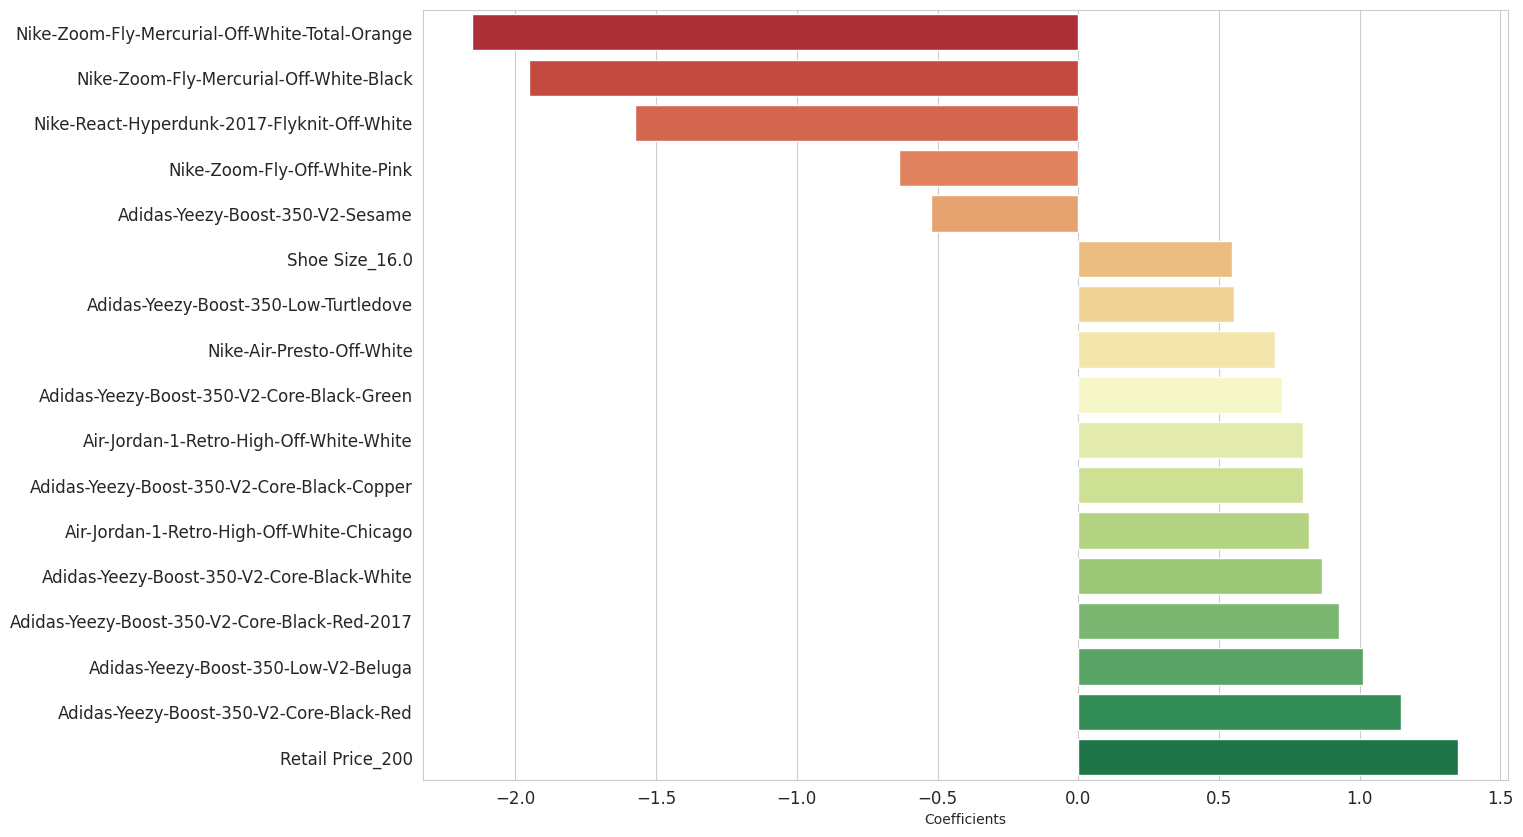

In [ ]:
#visualizing coefficients of most important features
important_df_sorted = important_df.sort_values(by='Coefficients')

plt.figure(figsize=[14, 10])
sns.barplot(y='Features', x='Coefficients', data = important_df_sorted, palette='RdYlGn')
plt.ylabel('Coefficient', fontsize=14)
plt.xlabel('Coefficients')
plt.ylabel('')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

**Observation**

Based on the visualization, we can identify the features that are valuable for predicting sales prices. On one hand, we have the negative coefficients, indicating features that are unhelpful for the model. On the other hand, we find positive coefficients, such as the Retail Price, which significantly contribute to the model's effectiveness.

## 3.3. DNN

In [ ]:
from keras.regularizers import l1

# Construct DNN for regression
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(X_train.shape[1], activation = 'relu', kernel_regularizer=l1(0.00001)),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])  # Optional: You can use mean absolute error as a metric

# Train the model with the custom callback
history = model.fit(X_train, y_train, epochs=20, batch_size=128)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
train_mae = history.history['mae'][-1]  # Get the final training MAE from the history object
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}, Train MAE: {train_mae}")

Epoch 1/20
532/532 [==============================] - 2s 3ms/step - loss: 1.1762 - mae: 0.4285
Epoch 2/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0362 - mae: 0.1105
Epoch 3/20
532/532 [==============================] - 2s 4ms/step - loss: 0.0291 - mae: 0.0939
Epoch 4/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0257 - mae: 0.0872
Epoch 5/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0233 - mae: 0.0828
Epoch 6/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0218 - mae: 0.0808
Epoch 7/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0203 - mae: 0.0785
Epoch 8/20
532/532 [==============================] - 1s 3ms/step - loss: 0.0191 - mae: 0.0775
Epoch 9/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0180 - mae: 0.0759
Epoch 10/20
532/532 [==============================] - 2s 3ms/step - loss: 0.0170 - mae: 0.0752
Epoch 11/20
532/532 [============================

In [ ]:
output_layer_weights = model.layers[-1].get_weights()[0]

feature_names = X_train.columns.tolist()

weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': output_layer_weights.flatten()})
weights_df['Feature'] = weights_df['Feature'].str.replace('Sneaker Name_', '')

DNN_df = weights_df[abs(weights_df.Weight) > 0.20].sort_values(by = 'Weight', ascending = False).reset_index().drop('index', axis = 1)
DNN_df

,Feature,Weight
0,Nike-Zoom-Fly-Off-White,0.239637
1,Nike-Blazer-Mid-Off-White-Grim-Reaper,0.235735
2,Nike-Air-Force-1-Low-Off-White,0.233909
3,Shoe Size_13.0,0.228552
4,Air-Jordan-1-Retro-High-Off-White-White,0.224939
5,Nike-Air-Force-1-Low-Off-White-Black-White,0.224219
6,Retail Price_160,0.217736
7,Buyer Region_Rhode Island,0.213539
8,Shoe Size_4.5,0.211065
9,Shoe Size_13.5,0.202733


### 3.3.1. Bar Chart

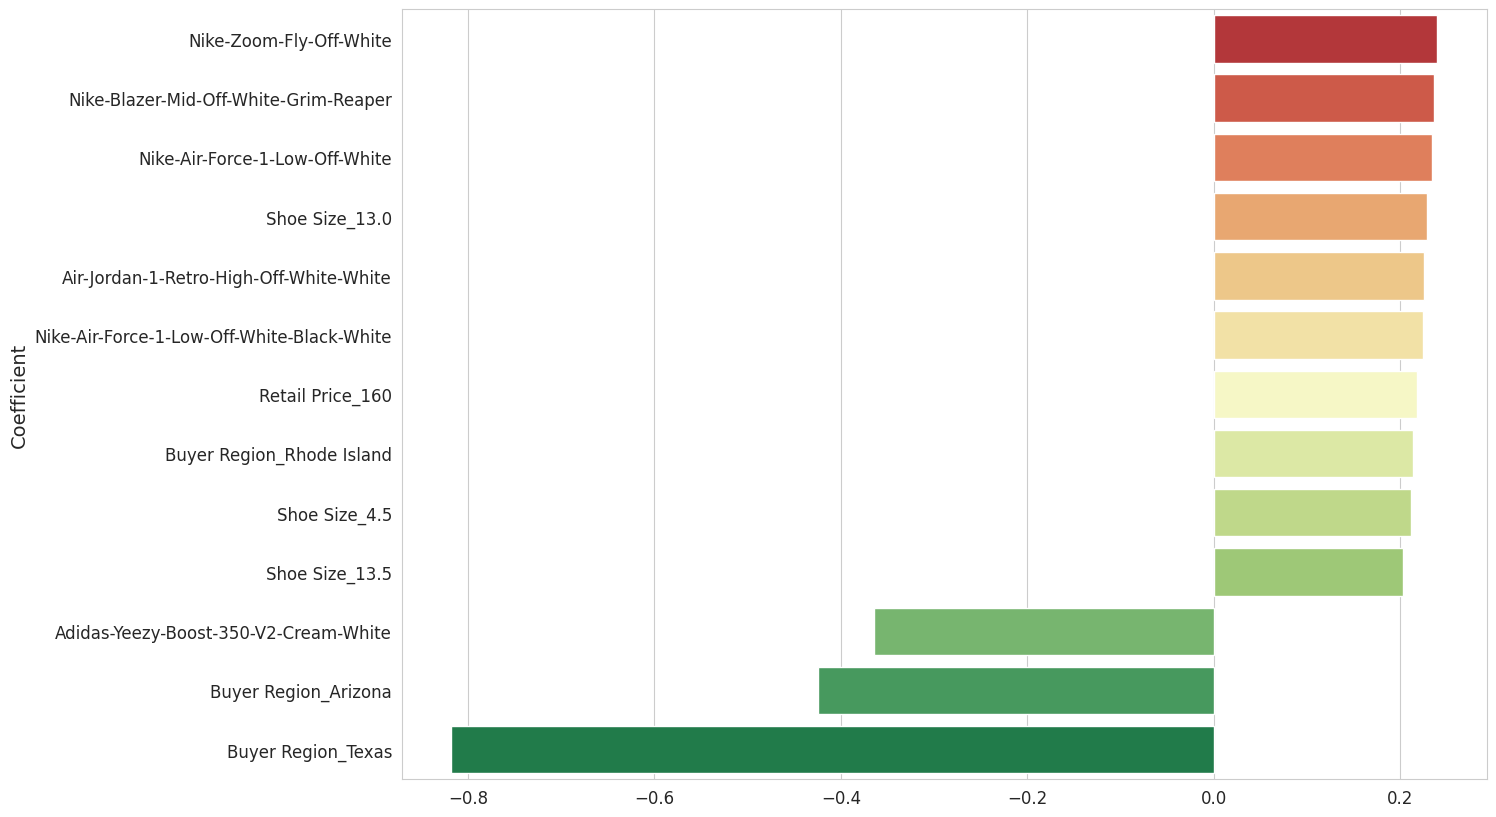

In [ ]:
# #visualizing coefficients of most important features
# important_df_sorted = important_df.sort_values(by='Coefficients')

plt.figure(figsize=[14, 10])
sns.barplot(y='Feature', x='Weight', data = DNN_df, palette='RdYlGn')
plt.ylabel('Coefficient', fontsize=14)
plt.xlabel('')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

**Observation**

The vistualization is providing which features are useful for the model's opinion to make proper predictions.



# 4. Conclusion

The analysis of the "Sneakers Resale Dynamics" database from StockX has unveiled valuable insights into the intricacies of the sneaker resale market. These findings offer significant implications for various stakeholders, including investors, retailers, and manufacturers, seeking to navigate this dynamic industry successfully.

First and foremost, the dataset encompassed an impressive 99,956 transactions, with Adidas Yeezys and Off-White Nikes prominently featured. This extensive dataset provides a robust foundation for comprehensive analysis.

The temporal dynamics of sneaker resale pricing were notably revealed through scatter plots, demonstrating a marked price decline after approximately 525 days post-launch. This phenomenon suggests a crucial "hype period" within which sneakers can be sold at premium prices, potentially incentivizing retailers and private sellers to strategically time their sales. Moreover, as time progresses, the popularity of sneakers tends to wane, further emphasizing the significance of this temporal window.

Additionally, the presence of outlier transactions, particularly for sizes less commonly found (e.g., 3.5, 15, 16, 17), indicates a strategy among private sneaker traders to capitalize on these less-produced sizes for higher returns. Conversely, popular sizes (8.5 - 13) exhibited more significant price outliers, potentially attracting higher premiums.

Four specific sneaker styles—Off-White Nike Air Presto, Yeezy Boost 350 Low (Turtledove), Off-White Air Jordan 1 Retro High (Chicago), and Off-White Air Jordan 1 Retro High (White)—commanded the highest prices, reflecting the premium associated with these styles.

The geographical distribution of sales, as visualized through a Choropleth map, showcased New York and California as the leading states in terms of accumulated sales. This highlights the potential for targeted marketing strategies or price discrimination in regions with higher demand or purchasing power.

Moreover, the data revealed that the demand for Yeezy and Off-White sneakers reached its peak in 2018, coinciding with significant sneaker launches and color set releases.

In conclusion, this data analytics project not only sheds light on past market dynamics but also presents opportunities for future marketing, sales, and production strategies. Targeted marketing, price discrimination, and strategic product releases are among the avenues for enhancing profitability in the sneaker resale industry. This project underscores the value of data-driven insights in optimizing strategies for sneaker production and sale, offering valuable lessons for this dynamic marketplace.

# 5. References



1.   StockX. (2019). "The 2019 Data Contest." [Dataset Page](https://stockx.com/news/the-2019-data-contest/).
2.   StockX. (2019). "Sneakers Resale Dynamics Dataset." [Download Dataset](https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019-3.xlsx).
3.   Farfetch. (n.d.). "Nike x Off-White: The History of Sneaker Drops." [Link](https://www.farfetch.com/style-guide/street-style/nike-x-off-white-history-sneaker-drops/).
4.   Farfetch. (n.d.). "The History of the Yeezy Boost 350." [Link](https://www.farfetch.com/style-guide/how-to/the-history-of-the-yeezy-boost-350/).

\

